In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import numpy as np
import pickle

%matplotlib inline

In [22]:
col_names = ['STEP','LAPV','TENG','LAPM','prevF','nextF','MV_STEP','ratio','trend','IMG_PATH','due']
# load dataset
album = pd.read_csv("album/album.csv", header=0, names=col_names)
album.head(20)

,STEP,LAPV,TENG,LAPM,prevF,nextF,MV_STEP,ratio,trend,IMG_PATH,due
0,1,251.33123,10097.56226,5.57582,251.33123,253.93729,4,0.000000,down,/home/pi/arducam/album/IMG_1586287564.png,big
1,2,253.93729,10192.56735,5.61917,251.33123,314.95798,3,1.010369,up,/home/pi/arducam/album/IMG_1586287566.png,big
2,3,314.95798,10838.07681,6.13424,253.93729,724.49440,2,1.240298,up,/home/pi/arducam/album/IMG_1586287568.png,small
3,4,724.49440,14143.70669,9.16528,314.95798,1194.77748,1,2.300289,up,/home/pi/arducam/album/IMG_1586287570.png,small
4,5,1194.77748,16415.26788,11.35394,724.49440,957.72307,0,1.649119,up,/home/pi/arducam/album/IMG_1586287572.png,small
5,6,957.72307,14134.46775,9.78335,1194.77748,420.52686,-1,0.801591,up,/home/pi/arducam/album/IMG_1586287574.png,small
6,7,420.52686,11094.97447,6.61637,957.72307,179.66330,-2,0.439090,down,/home/pi/arducam/album/IMG_1586287575.png,small
7,8,179.66330,8364.37853,4.71141,420.52686,121.08379,-3,0.427234,down,/home/pi/arducam/album/IMG_1586287577.png,big
8,9,121.08379,7128.46991,4.02497,179.66330,119.46119,-4,0.673948,down,/home/pi/arducam/album/IMG_1586287579.png,big
9,10,119.46119,7087.90218,3.98806,121.08379,119.46119,-5,0.986599,down,/home/pi/arducam/album/IMG_1586287581.png,big


In [23]:
print("NUM IMAGES: %d" %album.shape[0])

NUM IMAGES: 180


In [24]:
print("SET OF IMAGES: %d" % (album.shape[0]/10)) # Un set son 10 imagenes con distinto valor de enfoque

SET OF IMAGES: 18


In [25]:
album['due'].replace({'small':0, 'big':1}, inplace=True)
album['trend'].replace({'down':0, 'up':1}, inplace=True)

In [26]:
#album['due'].corr(album['MV_STEP'])

In [27]:
num_features = album.select_dtypes(include=['int64','float64']).columns
num_features[:]

Index(['STEP', 'LAPV', 'TENG', 'LAPM', 'prevF', 'nextF', 'MV_STEP', 'ratio',
       'trend', 'due'],
      dtype='object')

In [28]:
""" 
    Funcion que devuelve una lista de valores numericos y otra de valores categoricos,
    sin incluir SalePrice e Id. 
"""
def get_feature_groups():
    # Valores numericos
    num_features = album.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['due']) 

    # valores categoricos
    cat_features = album.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [29]:
corr = album[['due'] + num_features].corr()

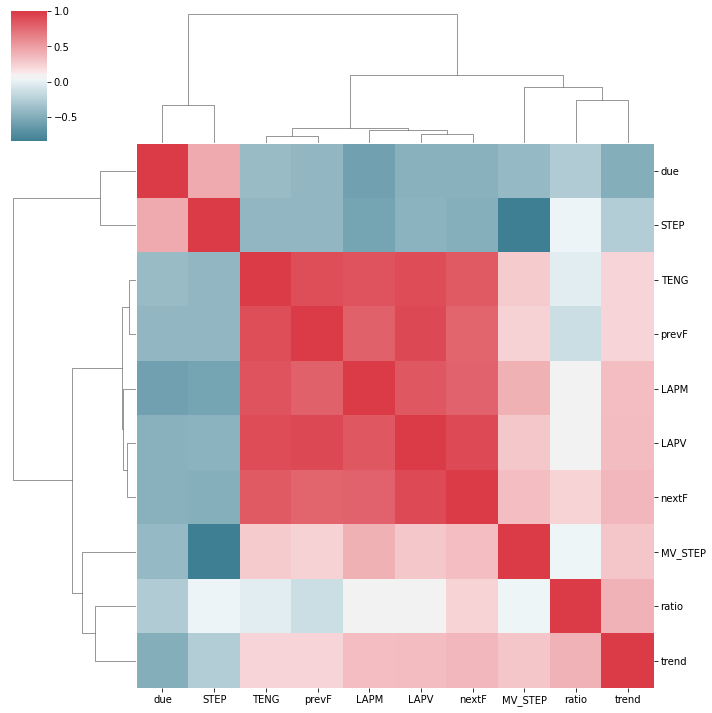

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.clustermap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap,figsize=(10, 10))

### Medidores de contraste en la imagen

In [31]:
#dataF = album['MLOG'].values
#dataF = album['TENG'].values
dataF = album['LAPV'].values

### Curvas con 20 puntos 

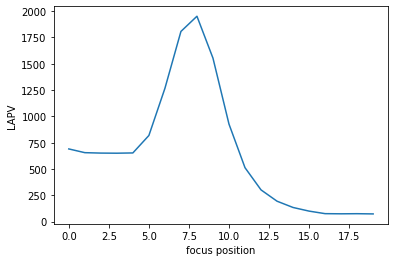

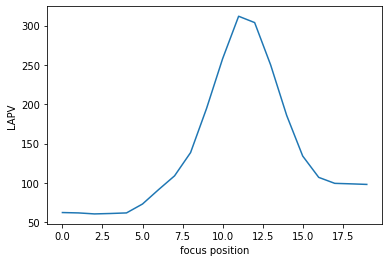

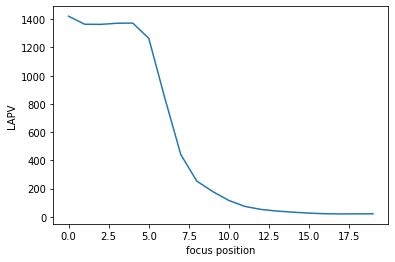

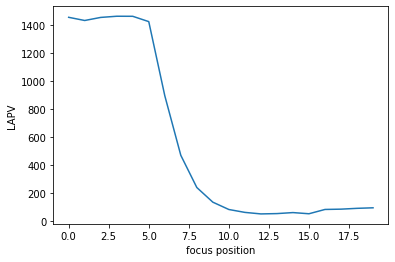

In [32]:
for i in range (100,180,20):
    plt.plot(dataF[i:(i+20)])
    plt.ylabel('LAPV')
    plt.xlabel('focus position')
    plt.show()

### Curvas con 10 puntos

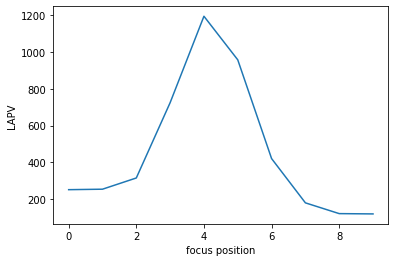

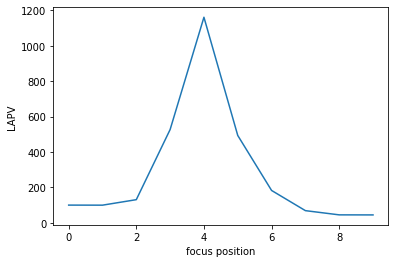

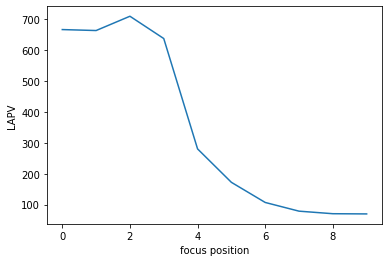

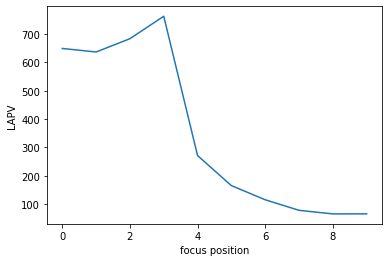

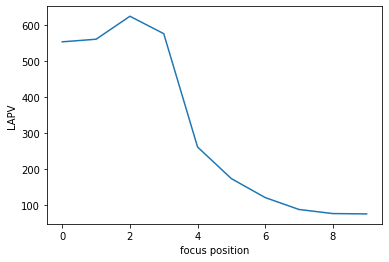

In [33]:
for i in range (0,50,10):
    plt.plot(dataF[i:(i+10)])
    plt.ylabel('LAPV')
    plt.xlabel('focus position')
    plt.show()

In [34]:
feature_cols = ['LAPV','TENG','LAPM','prevF','nextF','ratio', 'trend']

X = album[feature_cols] # Features
y = album.due # Target 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
filename = 'modelo.sav'
pickle.dump(clf, open(filename, 'wb'))
print("SAVE MODEL")

SAVE MODEL


In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [37]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [46]:
X_test.head()

,LAPV,TENG,LAPM,prevF,nextF,ratio,trend
116,75.21821,7795.30346,2.19204,99.45470,73.82645,0.756306,0
112,301.10461,15072.08533,3.87781,512.07323,193.59292,0.588011,0
99,39.73120,5511.11986,1.73710,39.51135,39.73120,1.005564,0
161,1435.62007,18563.78315,6.57481,1458.41980,1457.63226,0.984367,1
35,165.70449,11225.26604,3.39392,271.43299,115.81215,0.610480,0


In [47]:
y_test.head()

116    1
112    1
99     1
161    0
35     0
Name: due, dtype: int64

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['small', 'big'])
                #special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('album.png')

True

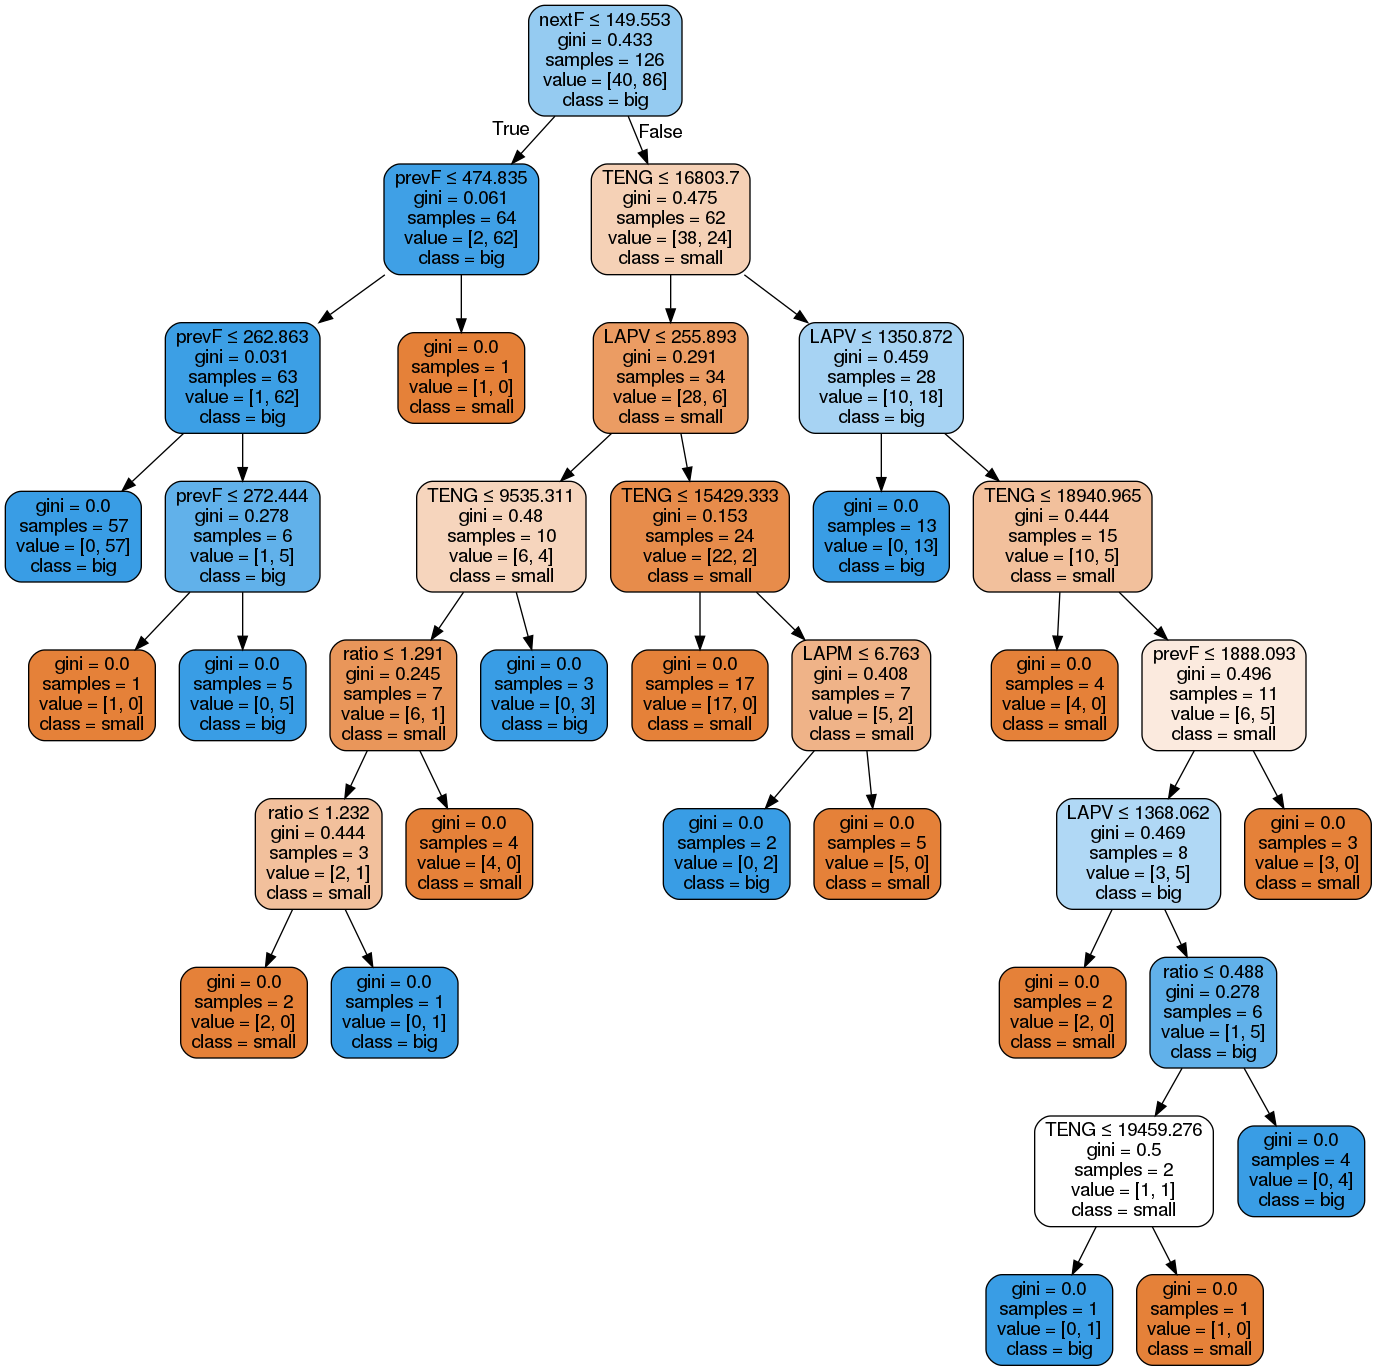

In [40]:
Image(graph.create_png())